# Empirical Method in Financial Econometrics: Final Exam {-}

## Name: Xijie Zhou {-}

## Exercise 0 {-}

| Stock  | Ticker  |  
|---|---|
|  1 | DIS  |    
|  2 | PG   |  
|  3 | SPY  |  
|Option File|20150102_48.csv|

## Exercise 1 {-}

### A {-}

In [58]:
import numpy as np

In [59]:
from scipy.stats import norm
def BLS_price(s,k,T,r,q,sigma):
    d1 = (np.log(s/k)+(r-q+ sigma ** 2/2)*T)/(sigma*np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    put_price = k * np.exp(-r*T) * norm.cdf(-d2) - s*np.exp(-q*T)*norm.cdf(-d1)
    return put_price

In [60]:
spy = 50
strike = 42.5
rf = 0.013
tenor = 90/365
sigma = 0.4
q = 0.025
p = BLS_price(spy,strike,tenor,rf,q,sigma)
print(p)

1.085929065393616


In [61]:
strike = 44
p = BLS_price(spy,strike,tenor,rf,q,sigma)
print(p)

1.4883511391847986


In [62]:
strike = 48
p = BLS_price(spy,strike,tenor,rf,q,sigma)
print(p)

3.0046350891369116


In [63]:
strike = 50
p = BLS_price(spy,strike,tenor,rf,q,sigma)
print(p)

4.011079195608197


In [64]:
strike = 52
p = BLS_price(spy,strike,tenor,rf,q,sigma)
print(p)

5.176198098753648


In [65]:
strike = 55
p = BLS_price(spy,strike,tenor,rf,q,sigma)
print(p)

7.193553964886185


In [73]:
def HW_price(s,k,T,r,q,sigma_hat):
    d1 = (np.log(s/k)+(r-q+ sigma_hat ** 2/2)*T)/(sigma_hat*np.sqrt(T))
    d2 = d1 - sigma_hat * np.sqrt(T)
    put_price = np.mean(k * np.exp(-r*T) * norm.cdf(-d2) - s*np.exp(-q*T)*norm.cdf(-d1))
    return put_price

In [74]:
z = np.random.randn(1,1000)
V = np.exp(np.log(40)-(1.2*1.2/2)+1.2*z)
sigma_hat = V/100

strike = 42.5
p = HW_price(spy,strike,tenor,rf,q,sigma_hat)
print(p)

1.7669018189205485


In [75]:
strike = 44
p = HW_price(spy,strike,tenor,rf,q,sigma_hat)
print(p)

2.025220419501628


In [76]:
strike = 48
p = HW_price(spy,strike,tenor,rf,q,sigma_hat)
print(p)

3.037069327726387


In [77]:
strike = 50
p = HW_price(spy,strike,tenor,rf,q,sigma_hat)
print(p)

3.9088048488475646


In [78]:
strike = 52
p = HW_price(spy,strike,tenor,rf,q,sigma_hat)
print(p)

5.235822143079598


In [79]:
strike = 55
p = HW_price(spy,strike,tenor,rf,q,sigma_hat)
print(p)

7.63134798393759


|   |   | Put Price implied by   |   
|---|---|---|
|  K | Black-Scholes  |  Hull-White |   
|  42.5 | 1.085929065393616  |  1.7669018189205485 |   
|  44 |   1.4883511391847986  |  2.025220419501628 | 
|  48 |  3.0046350891369116 | 3.037069327726387  | 
|  50 | 4.011079195608197  |  3.9088048488475646 | 
|  52 | 5.176198098753648  |  5.235822143079598 | 
|  55 | 7.193553964886185  |  7.63134798393759 | 

### B {-}

In [92]:
strike = np.array([42.5,44,48,50,52,55])
spy = np.array([50,50,50,50,50,50])
ratio = strike/spy
BLS_p = np.array([1.085929065393616,1.4883511391847986,3.0046350891369116,4.011079195608197,5.176198098753648,7.193553964886185])
HW_p = np.array([1.7669018189205485,2.025220419501628,3.037069327726387,3.9088048488475646,5.235822143079598,7.63134798393759])

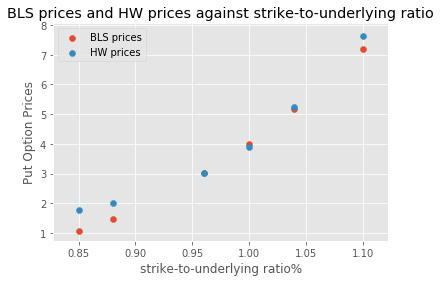

In [94]:
import matplotlib.pyplot as plt
import matplotlib.legend
with plt.style.context("ggplot"):
    line1 = plt.scatter(ratio,BLS_p)
    line2 = plt.scatter(ratio,HW_p)
    plt.legend(['BLS prices','HW prices'])
    plt.xlabel("strike-to-underlying ratio%")
    plt.ylabel("Put Option Prices")
    plt.title("BLS prices and HW prices against strike-to-underlying ratio")

Interpret: It is clear to see that the Hull-White put prices are higher than the Black-Scholes put prices generally. I think the reason lies in the difference of these two models, which is the sigma chosen. Black-Scholes put prices are created by a simple constant volatility. However, the volatility in Hull-White model includes stochastic process, which is more accurate than the Black-Scholes model. I think the random volatility in the Hull-White model can help explain the under-pricing by the Black-Scholes model, because the estimated prices match the market prices better when adding the random volatility in the model.

### C {-}

In [444]:
import os
os.chdir("/Users/zhouxijie/python/final exam/datas")

In [96]:
def load_data(filename,columns=0):
    data = np.loadtxt(filename,delimiter = ',',usecols = columns)
    return data

In [99]:
data = load_data("20150102_48.csv",(0,2,3,4,5,6,7))
print(option_data[0])

[2.0150102e+07 2.0541000e+02 2.0000000e-02 2.2098000e+00 3.6500000e-01
 1.7000000e+02 4.9000000e+01]


In [138]:
dates,spy,rf,q,put,strike,tenor = (
    data[:,0],
    data[:,1],
    data[:,2]/100,
    data[:,3]/100,
    data[:,4],
    data[:,5],
    data[:,6]/365)

In [123]:
def get_return(fileaddress):
    date, time, price = np.loadtxt(fileaddress, delimiter = ',', unpack = True)
    N = sum(date == date[0]) 
    T = len(date)//N 
    returns = np.diff((np.reshape(np.log(price), (N,T), order = 'F')), axis = 0)
    return returns, date

In [124]:
r, date = get_return('/Users/zhouxijie/python/final exam/datas/SPY.csv')

In [125]:
day = np.where(date == 20150102)[0][0]//78

In [126]:
def realized_var(returns):
    RV = sum(returns**2) 
    return RV

In [127]:
RV = np.sqrt(realized_var(r[:,2014])*252)*100
print(RV)

12.494961571074171


In [309]:
BLS_p = BLS_price(spy,strike,tenor,rf,q,RV/100)

In [186]:
z = np.random.randn(1,1000)
V = np.exp(np.log(RV)-(1.2*1.2/2)+1.2*z)
sigma_hat = V/100

In [200]:
HW_p = []
for i in range(0,48):
    HW_p.append(HW_price(spy[i],strike[i],tenor[i],rf[i],q[i],sigma_hat))
HW_p = np.array(HW_p)

In [199]:
ratio = strike/spy

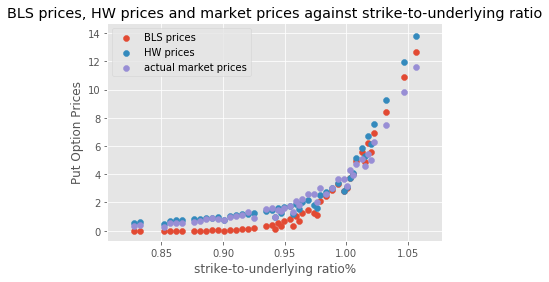

In [198]:
import matplotlib.pyplot as plt
import matplotlib.legend
with plt.style.context("ggplot"):
    line1 = plt.scatter(ratio,BLS_p)
    line2 = plt.scatter(ratio,HW_p)
    line3 = plt.scatter(ratio,put)
    plt.legend(['BLS prices','HW prices','actual market prices'])
    plt.xlabel("strike-to-underlying ratio%")
    plt.ylabel("Put Option Prices")
    plt.title("BLS prices, HW prices and market prices against strike-to-underlying ratio")

In [203]:
Average_BLS_p = np.mean(BLS_p)
Average_HW_p = np.mean(HW_p)
print(Average_BLS_p)
print(Average_HW_p)

2.1168462997109367
2.800789038410361


Interpret: The file I use is "20150102_48". The average price from the Black-Scholes model is 2.1168; The average price from the Hull-White model is 2.8008. From the figure above, we can see that the pricing of OTM puts by the Hull-White model is much better than the Black-Scholes model. I think the stochastic volatility truely help with pricing out-of-the-money put options. When the strike-to-underlying ratio is from 0.98-1.02, the differences that the models compare to the market price is the least.

## Exercise 2 {-}

### A {-}

In [507]:
r_1, date_1 = get_return('/Users/zhouxijie/python/final exam/datas/DIS.csv')

In [508]:
r_2, date_2 = get_return('/Users/zhouxijie/python/final exam/datas/PG.csv')

In [509]:
realized_beta_1 = []
for i in range(0,2769):
    realized_beta_1.append(np.sum((r[:,i]*r_1[:,i]))/np.sum(r[:,i]*r[:,i]))

In [510]:
realized_beta_2 = []
for i in range(0,2769):
    realized_beta_2.append(np.sum((r[:,i]*r_2[:,i]))/np.sum(r[:,i]*r[:,i]))

In [511]:
Average_rb1 = np.mean(realized_beta_1)
print(Average_rb1)
Average_rb2 = np.mean(realized_beta_2)
print(Average_rb2)

0.9372810762752267
0.5454156664249717


In [512]:
Min_rb1 = np.min(realized_beta_1)
print(Min_rb1)
Min_rb2 = np.min(realized_beta_2)
print(Min_rb2)

-1.0811145134104991
-0.4166602658009185


In [513]:
Per_25_1 = np.percentile(realized_beta_1,25)
print(Per_25_1)
Per_25_2 = np.percentile(realized_beta_2,25)
print(Per_25_2)

0.7757819580852029
0.3778622648870579


In [514]:
Per_50_1 = np.percentile(realized_beta_1,50)
print(Per_50_1)
Per_50_2 = np.percentile(realized_beta_2,50)
print(Per_50_2)

0.9468146700941424
0.5348547035059938


In [515]:
Per_75_1 = np.percentile(realized_beta_1,75)
print(Per_75_1)
Per_75_2 = np.percentile(realized_beta_2,75)
print(Per_75_2)

1.1089788490175745
0.7070440738738019


In [516]:
Max_rb1 = np.max(realized_beta_1)
print(Max_rb1)
Max_rb2 = np.max(realized_beta_2)
print(Max_rb2)

3.134483648417962
2.042069465609289


|   | $$R\beta_{Stock1,Market}$$  | $$R\beta_{Stock2,Market}$$    |   
|---|---|---|
|  Average | 0.9372810762752267  |  0.5454156664249717 |   
|  Minimum | -1.0811145134104991  |  -0.4166602658009185 |   
|  25% Percentile |  0.7757819580852029 |  0.3778622648870579 | 
|  50% Percentile |  0.9468146700941424| 0.5348547035059938 | 
|  75% Percentile | 1.1089788490175745 | 0.7070440738738019| 
|  Maximum | 3.134483648417962 | 2.042069465609289| 

In [517]:
N = sum(date_1 == date_1[0]) 
T = len(date_1)//N 
dates=np.reshape(date_1,(N,T),order = 'F')

In [518]:
strdate = []
for i in dates[1,:]:
    strdate.append(str(int(i)))

In [519]:
dates = []
for i in range(len(strdate)):
    dates.append(datetime.strptime(strdate[i], '%Y%m%d'))

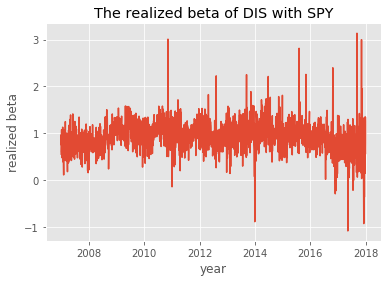

In [520]:
from datetime import datetime
with plt.style.context("ggplot"):
    plt.plot(dates,realized_beta_1)
    plt.xlabel('year')
    plt.ylabel('realized beta')
    plt.title('The realized beta of DIS with SPY')

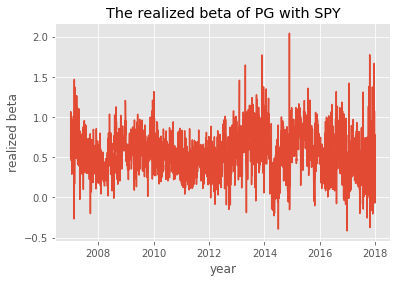

In [521]:
with plt.style.context("ggplot"):
    plt.plot(dates,realized_beta_2)
    plt.xlabel('year')
    plt.ylabel('realized beta')
    plt.title('The realized beta of PG with SPY')

Interpret: The plots of DIS fluctuated around 0.9 generally and the plots of PG fluctuated around 0.5 generally, so the stock returns of PG is not so close to the market return, which is represented by SPY here. In general, when the scale of realized beta is between 0 and 1, it means that the stock return is less than the market income; when it is less than 0, it indicates that the stock not only has no income, but a loss; when it is greater than 1, it shows that the stock returns are more than the market income. 

### B {-}

In [536]:
rv_1 = np.sqrt(252*realized_var(r_1))*100
rv_2 = np.sqrt(252*realized_var(r_2))*100

In [537]:
Average_rv_1 = np.mean(rv_1)
Average_rv_2 = np.mean(rv_2)
print(Average_rv_1)
print(Average_rv_2)
Min_rv_1 = np.min(rv_1)
Min_rv_2 = np.min(rv_2)
print(Min_rv_1)
print(Min_rv_2)
Per_25_rv_1 = np.percentile(rv_1,25)
Per_25_rv_2 = np.percentile(rv_2,25)
print(Per_25_rv_1)
print(Per_25_rv_2)
Per_50_rv_1 = np.percentile(rv_1,50)
Per_50_rv_2 = np.percentile(rv_2,50)
print(Per_50_rv_1)
print(Per_50_rv_2)
Per_75_rv_1 = np.percentile(rv_1,75)
Per_75_rv_2 = np.percentile(rv_2,75)
print(Per_75_rv_1)
print(Per_75_rv_2)
Max_rv_1 = np.max(rv_1)
Max_rv_2 = np.max(rv_2)
print(Max_rv_1)
print(Max_rv_2)

18.327885197254957
13.357460282810921
5.681423418887914
4.825248283116661
11.720755941935643
9.07685105629298
15.019035530425818
11.364598799912011
20.745396216715775
14.894888013837887
165.66328353148913
121.56429909053088


In [538]:
ind = r_1>=0
r_1_p = r_1*ind
rv_1_p = np.sqrt(252*realized_var(r_1_p))*100

ind = r_2>=0
r_2_p = r_2*ind
rv_2_p = np.sqrt(252*realized_var(r_2_p))*100


Average_rv_1_p = np.mean(rv_1_p)
Average_rv_2_p = np.mean(rv_2_p)
print(Average_rv_1_p)
print(Average_rv_2_p)
Min_rv_1_p = np.min(rv_1_p)
Min_rv_2_p = np.min(rv_2_p)
print(Min_rv_1_p)
print(Min_rv_2_p)
Per_25_rv_1_p = np.percentile(rv_1_p,25)
Per_25_rv_2_p = np.percentile(rv_2_p,25)
print(Per_25_rv_1_p)
print(Per_25_rv_2_p)
Per_50_rv_1_p = np.percentile(rv_1_p,50)
Per_50_rv_2_p = np.percentile(rv_2_p,50)
print(Per_50_rv_1_p)
print(Per_50_rv_2_p)
Per_75_rv_1_p = np.percentile(rv_1_p,75)
Per_75_rv_2_p = np.percentile(rv_2_p,75)
print(Per_75_rv_1_p)
print(Per_75_rv_2_p)
Max_rv_1_p = np.max(rv_1_p)
Max_rv_2_p = np.max(rv_2_p)
print(Max_rv_1_p)
print(Max_rv_2_p)

12.881831322420995
9.44658926794523
3.159627093141045
2.730986283659158
8.148802054041987
6.305368713558153
10.589108275187007
7.952222854538945
14.440848754608268
10.544654271462077
128.2541802903802
95.45315697077751


In [539]:
ind = r_1<0
r_1_n = r_1*ind
rv_1_n = np.sqrt(252*realized_var(r_1_n))*100

ind = r_2<0
r_2_n = r_2*ind
rv_2_n = np.sqrt(252*realized_var(r_2_n))*100

Average_rv_1_n = np.mean(rv_1_n)
Average_rv_2_n = np.mean(rv_2_n)
print(Average_rv_1_n)
print(Average_rv_2_n)
Min_rv_1_n = np.min(rv_1_n)
Min_rv_2_n = np.min(rv_2_n)
print(Min_rv_1_n)
print(Min_rv_2_n)
Per_25_rv_1_n = np.percentile(rv_1_n,25)
Per_25_rv_2_n = np.percentile(rv_2_n,25)
print(Per_25_rv_1_n)
print(Per_25_rv_2_n)
Per_50_rv_1_n = np.percentile(rv_1_n,50)
Per_50_rv_2_n = np.percentile(rv_2_n,50)
print(Per_50_rv_1_n)
print(Per_50_rv_2_n)
Per_75_rv_1_n = np.percentile(rv_1_n,75)
Per_75_rv_2_n = np.percentile(rv_2_n,75)
print(Per_75_rv_1_n)
print(Per_75_rv_2_n)
Max_rv_1_n = np.max(rv_1_n)
Max_rv_2_n = np.max(rv_2_n)
print(Max_rv_1_n)
print(Max_rv_2_n)

12.830355097818842
9.304824525657896
3.133739902899201
2.4570531833069778
7.925145256504812
6.1849527968023805
10.51683112867519
7.882630783902718
14.784952262068881
10.482437620738986
104.85794556673906
75.27664735948433


|   |  | Stock 1   |  |   | Stock 2  |   |
|---|---|---|--- |---|---|---|
|   | $$RV_t\%$$  | $$RV_t^+\%$$    |   $$RV_t^-\%$$   | $$RV_t\%$$  | $$RV_t^+\%$$    |   $$RV_t^-\%$$   |
|  Average | 18.33  | 12.88  | 12.83 | 13.36  | 9.45  | 9.30  | 
|  Minimum | 5.68 | 3.16  | 3.13 |  4.83 | 2.73  | 2.46  |   
|  25% Percentile | 11.72 |  8.15 | 7.93 | 9.08  | 6.31  | 6.18  |  
|  50% Percentile | 15.02  | 10.59  | 10.52 | 11.36  | 7.95  | 7.88  |  
|  75% Percentile | 20.75 |  14.44 | 14.78 |  14.89 | 10.54  | 10.48  | 
|  Maximum | 165.66 | 128.25  | 104.86 | 121.56  | 95.45  | 75.28  | 

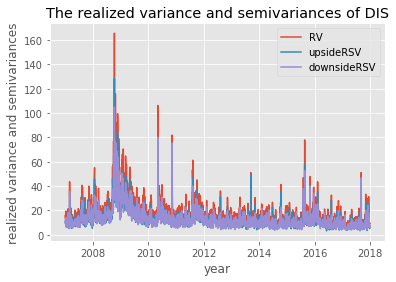

In [540]:
with plt.style.context("ggplot"):
    line1 = plt.plot(dates,rv_1)
    line2 = plt.plot(dates,rv_1_p)
    line3 = plt.plot(dates,rv_1_n)
    plt.legend(['RV','upsideRSV','downsideRSV'])
    plt.xlabel('year')
    plt.ylabel('realized variance and semivariances%')
    plt.title('The realized variance and semivariances of DIS')

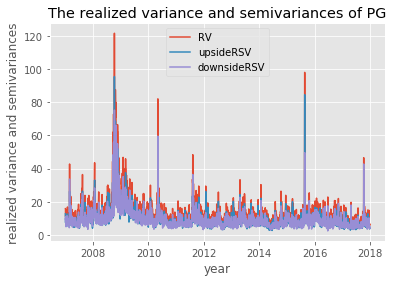

In [541]:
with plt.style.context("ggplot"):
    line1 = plt.plot(dates,rv_2)
    line2 = plt.plot(dates,rv_2_p)
    line3 = plt.plot(dates,rv_2_n)
    plt.legend(['RV','upsideRSV','downsideRSV'])
    plt.xlabel('year')
    plt.ylabel('realized variance and semivariances%')
    plt.title('The realized variance and semivariances of PG')

Interpret: As we can be seen from the plots, upside and downside realized semivariance follow the simillar pattern with the realized variance. Notice that the upside realizde variance is mostly higher when there is huge volatility, but still can not match the realized variance completely. Focus on data around 2008 crisis (actuall on 2009), the pattern of semivariance still similar to the realized variance. At the same time, a higher volatility in market happened.

### C {-}

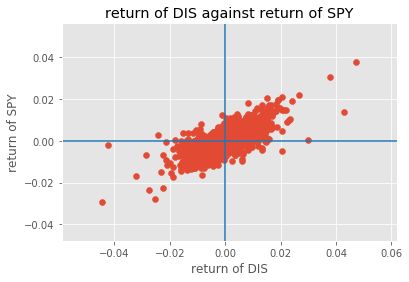

In [528]:
with plt.style.context("ggplot"):
    plt.scatter(r_1,r)
    plt.xlabel("return of DIS")
    plt.ylabel("return of SPY")
    plt.title("return of DIS against return of SPY")
    plt.axhline()
    plt.axvline()

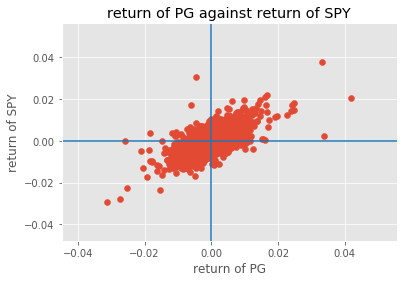

In [529]:
with plt.style.context("ggplot"):
    plt.scatter(r_2,r)
    plt.xlabel("return of PG")
    plt.ylabel("return of SPY")
    plt.title("return of PG against return of SPY")
    plt.axhline()
    plt.axvline()

Interpret: First of all, both sotcks returns tend to move positively with the direction of the market returns. For market returns are below 0, there are only a few instances (lower right quadrant) where the stock returns are positive, with the majority of stock returns being negative (lower left quadrant). For market returns are higher than 0, there are only a few instances (upper left quadrant) where the stock returns are negative, with the majority of stock returns being positive (upper right quadrant).

### D {-}

Interpret: If the stock moves in the same direction as the market, investors will need higher expected returns to hold the stock. Because the stock cann't hedge risk. On the contrary, if a stock moves adversely in the direction of the market, it means that the asset's beta is negative. When investors add this asset to their portfolio, the overall risk of the portfolio will be hedged. Investors will not require high expected returns on holding assets in their portfolios. Based on my solution, my stocks comove positively with the market. I hope my stocks could have high risk premiums, because it means the higher chance of high profits. 

### E {-}

In [530]:
ind = r>=0
r_p = r*ind

ind = r<0
r_n = r*ind

In [531]:
rb_1_pp = []
for i in range(0,2769):
    rb_1_pp.append(np.sum((r_p[:,i]*r_1_p[:,i]))/np.sum(r[:,i]*r[:,i]))
    
rb_1_pn = []
for i in range(0,2769):
    rb_1_pn.append(np.sum((r_p[:,i]*r_1_n[:,i]))/np.sum(r[:,i]*r[:,i]))

rb_1_np = []
for i in range(0,2769):
    rb_1_np.append(np.sum((r_n[:,i]*r_1_p[:,i]))/np.sum(r[:,i]*r[:,i]))
    
rb_1_nn = []
for i in range(0,2769):
    rb_1_nn.append(np.sum((r_n[:,i]*r_1_n[:,i]))/np.sum(r[:,i]*r[:,i]))

In [532]:
rb_2_pp = []
for i in range(0,2769):
    rb_2_pp.append(np.sum((r_p[:,i]*r_2_p[:,i]))/np.sum(r[:,i]*r[:,i]))
    
rb_2_pn = []
for i in range(0,2769):
    rb_2_pn.append(np.sum((r_p[:,i]*r_2_n[:,i]))/np.sum(r[:,i]*r[:,i]))

rb_2_np = []
for i in range(0,2769):
    rb_2_np.append(np.sum((r_n[:,i]*r_2_p[:,i]))/np.sum(r[:,i]*r[:,i]))
    
rb_2_nn = []
for i in range(0,2769):
    rb_2_nn.append(np.sum((r_n[:,i]*r_2_n[:,i]))/np.sum(r[:,i]*r[:,i]))

In [542]:
Average_rb_1_pp = np.mean(rb_1_pp)
Average_rb_1_pn = np.mean(rb_1_pn)
Average_rb_1_np = np.mean(rb_1_np)
Average_rb_1_nn = np.mean(rb_1_nn)
print(Average_rb_1_pp)
print(Average_rb_1_pn)
print(Average_rb_1_np)
print(Average_rb_1_nn)

Average_rb_2_pp = np.mean(rb_2_pp)
Average_rb_2_pn = np.mean(rb_2_pn)
Average_rb_2_np = np.mean(rb_2_np)
Average_rb_2_nn = np.mean(rb_2_nn)
print(Average_rb_2_pp)
print(Average_rb_2_pn)
print(Average_rb_2_np)
print(Average_rb_2_nn)

0.5527766894271416
-0.08195783306741487
-0.07683115464629818
0.543293374561798
0.37285569019613046
-0.0911586795611272
-0.08918364556970317
0.35290230135967177


In [543]:
Min_rb_1_pp = np.min(rb_1_pp)
Min_rb_1_pn = np.min(rb_1_pn)
Min_rb_1_np = np.min(rb_1_np)
Min_rb_1_nn = np.min(rb_1_nn)
print(Min_rb_1_pp)
print(Min_rb_1_pn)
print(Min_rb_1_np)
print(Min_rb_1_nn)

Min_rb_2_pp = np.min(rb_2_pp)
Min_rb_2_pn = np.min(rb_2_pn)
Min_rb_2_np = np.min(rb_2_np)
Min_rb_2_nn = np.min(rb_2_nn)
print(Min_rb_2_pp)
print(Min_rb_2_pn)
print(Min_rb_2_np)
print(Min_rb_2_nn)

0.05127519061899447
-1.1849176268078934
-1.4838945583378844
0.06738366254880157
0.06256245281510617
-1.268049710714106
-0.8667662539188542
0.04567104816113811


In [544]:
Per_25_rb_1_pp = np.percentile(rb_1_pp,25)
Per_25_rb_1_pn = np.percentile(rb_1_pn,25)
Per_25_rb_1_np = np.percentile(rb_1_np,25)
Per_25_rb_1_nn = np.percentile(rb_1_nn,25)
print(Per_25_rb_1_pp)
print(Per_25_rb_1_pn)
print(Per_25_rb_1_np)
print(Per_25_rb_1_nn)

Per_25_rb_2_pp = np.percentile(rb_2_pp,25)
Per_25_rb_2_pn = np.percentile(rb_2_pn,25)
Per_25_rb_2_np = np.percentile(rb_2_np,25)
Per_25_rb_2_nn = np.percentile(rb_2_nn,25)
print(Per_25_rb_2_pp)
print(Per_25_rb_2_pn)
print(Per_25_rb_2_np)
print(Per_25_rb_2_nn)

0.40458167041328186
-0.1007742133727276
-0.0940433600817832
0.40680129284810845
0.2505129919041556
-0.11718503783712385
-0.11339229512390292
0.24261983081668745


In [545]:
Per_50_rb_1_pp = np.percentile(rb_1_pp,50)
Per_50_rb_1_pn = np.percentile(rb_1_pn,50)
Per_50_rb_1_np = np.percentile(rb_1_np,50)
Per_50_rb_1_nn = np.percentile(rb_1_nn,50)
print(Per_50_rb_1_pp)
print(Per_50_rb_1_pn)
print(Per_50_rb_1_np)
print(Per_50_rb_1_nn)

Per_50_rb_2_pp = np.percentile(rb_2_pp,50)
Per_50_rb_2_pn = np.percentile(rb_2_pn,50)
Per_50_rb_2_np = np.percentile(rb_2_np,50)
Per_50_rb_2_nn = np.percentile(rb_2_nn,50)
print(Per_50_rb_2_pp)
print(Per_50_rb_2_pn)
print(Per_50_rb_2_np)
print(Per_50_rb_2_nn)

0.5198779231022732
-0.05076867453047529
-0.04777163885120527
0.5200142208896111
0.3403516289303669
-0.06150430416543107
-0.06322360634882052
0.33004350733527155


In [546]:
Per_75_rb_1_pp = np.percentile(rb_1_pp,75)
Per_75_rb_1_pn = np.percentile(rb_1_pn,75)
Per_75_rb_1_np = np.percentile(rb_1_np,75)
Per_75_rb_1_nn = np.percentile(rb_1_nn,75)
print(Per_75_rb_1_pp)
print(Per_75_rb_1_pn)
print(Per_75_rb_1_np)
print(Per_75_rb_1_nn)

Per_75_rb_2_pp = np.percentile(rb_2_pp,75)
Per_75_rb_2_pn = np.percentile(rb_2_pn,75)
Per_75_rb_2_np = np.percentile(rb_2_np,75)
Per_75_rb_2_nn = np.percentile(rb_2_nn,75)
print(Per_75_rb_2_pp)
print(Per_75_rb_2_pn)
print(Per_75_rb_2_np)
print(Per_75_rb_2_nn)

0.6646882841606637
-0.02477208756913299
-0.024984782745866373
0.654965619823472
0.4623674914760752
-0.03210443362671408
-0.033371830403132595
0.43270988074591393


In [547]:
Max_rb_1_pp = np.max(rb_1_pp)
Max_rb_1_pn = np.max(rb_1_pn)
Max_rb_1_np = np.max(rb_1_np)
Max_rb_1_nn = np.max(rb_1_nn)
print(Max_rb_1_pp)
print(Max_rb_1_pn)
print(Max_rb_1_np)
print(Max_rb_1_nn)

Max_rb_2_pp = np.max(rb_2_pp)
Max_rb_2_pn = np.max(rb_2_pn)
Max_rb_2_np = np.max(rb_2_np)
Max_rb_2_nn = np.max(rb_2_nn)
print(Max_rb_2_pp)
print(Max_rb_2_pn)
print(Max_rb_2_np)
print(Max_rb_2_nn)

3.0760018744112974
0.0
0.0
2.589068487173038
1.8723696852704312
-0.0005221473201412088
-0.0010052193156259792
1.5394607097494466


||Stock 1|and| Market |Index|Stock 2|  and |Market|Index|
|---|---|---|---|---|---     |---|---|---|
||$$R\beta_t^{+,+}$$|$$R\beta_t^{+,-}$$|$$R\beta_t^{-,+}$$|$$R\beta_t^{-,-}$$|$$R\beta_t^{+,+}$$|$$R\beta_t^{+,-}$$| $$R\beta_t^{-,+}$$| $$R\beta_t^{-,-}$$|
|  Average | 0.55 | -0.08  | -0.08 |  0.54 | 0.37  | -0.09  |-0.09 |0.35 |  
|  Minimum | 0.05 | -1.18 | -1.48 |  0.07 |  0.06 | -1.27  | -0.87| 0.05|  
|  25% Percentile | 0.40 | -0.10  | -0.09 | 0.41  |  0.25 |  -0.12 |-0.11  |0.24 |
|  50% Percentile | 0.52  | -0.05  |-0.05  | 0.52  | 0.34  | -0.06  | -0.06 | 0.33|
|  75% Percentile | 0.66 | -0.02  | -0.02 | 0.65  | 0.46  | -0.03  |-0.03 |0.43 |
|  Maximum | 3.08 | 0.00  | 0.00 |  2.59 | 1.87  | -0.00  |-0.00 | 1.54|

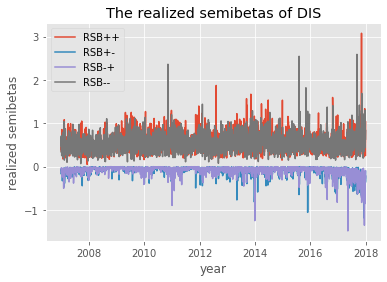

In [534]:
 with plt.style.context("ggplot"):
    line1 = plt.plot(dates,rb_1_pp)
    line2 = plt.plot(dates,rb_1_pn)
    line3 = plt.plot(dates,rb_1_np)
    line4 = plt.plot(dates,rb_1_nn)
    plt.legend(['RSB++','RSB+-','RSB-+','RSB--'])
    plt.xlabel('year')
    plt.ylabel('realized semibetas')
    plt.title('The realized semibetas of DIS')

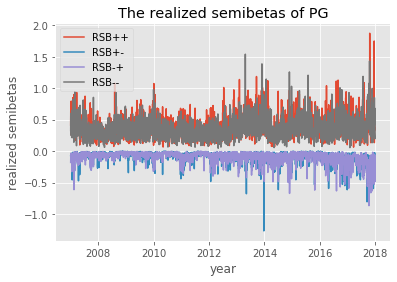

In [535]:
 with plt.style.context("ggplot"):
    line1 = plt.plot(dates,rb_2_pp)
    line2 = plt.plot(dates,rb_2_pn)
    line3 = plt.plot(dates,rb_2_np)
    line4 = plt.plot(dates,rb_2_nn)
    plt.legend(['RSB++','RSB+-','RSB-+','RSB--'])
    plt.xlabel('year')
    plt.ylabel('realized semibetas')
    plt.title('The realized semibetas of PG')

Interpret: It is clear to see that the realized semibetas (RSB) fluctuated over time. We can see the RSB++, RSB-- are above 0, while RSB+-, RSB-+ are below 0. And the RSB++, RSB-- fluctuated more dramatically than the other two RSB. The two realized betas when market returns are negative combined gives the risk measure of the stock which an investor who only cares about downside risks concerns, that is, the magnitudes of RSB-+ and RSB-- suggest the degree of my stocks risk premium.